### **What are nodes in Neural Network?**

In neural network nodes plays a crucial role in mathematical operation which applies the weights and biases, which perform the computation and produce the output

In [14]:
# Importing the required libraries

from sklearn.datasets import make_blobs         # Blobs means different regions or clusters
from keras.layers import Dense                  # Dense means Adds a dense layer to the model.
from keras.models import Sequential             # Sets up a neural network model
from keras.optimizers import SGD                # Sets up the optimizer (Stochastic Gradient Descent)
from keras.utils import to_categorical          # Prepares the target variable
from matplotlib import pyplot

import warnings
warnings.filterwarnings("ignore")

nodes=1: 0.108
nodes=2: 0.398
nodes=3: 0.676
nodes=4: 0.722
nodes=5: 0.826
nodes=6: 0.878
nodes=7: 1.000


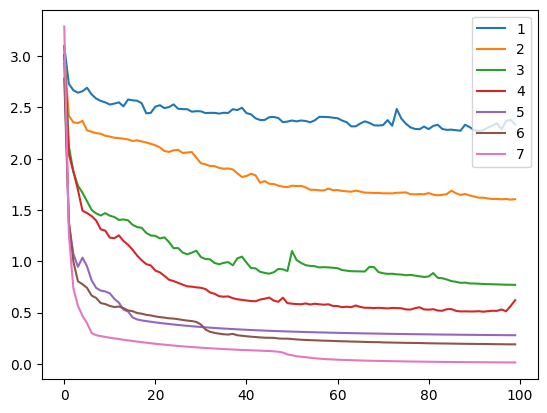

In [15]:
# Preparing the Multi-Class-Classification Dataset

def create_dataset():

  #Generating the 2-d classification dataset
  # n_samples means we are working with 1000 observations
  # Creating 20 blobs or centers
  # Standard deviation is 2 between the clusters
  # Creating 20 seperate groups with 100 features
  X,y=make_blobs(n_samples=1000,centers=20,n_features=100,cluster_std=2,random_state=2)

  #Implementing the one hot encoding to Output variable
  y=to_categorical(y)

  # We have 500 observations
  n_train=500

  #Splitting the data into training & testing
  trainX,testX=X[:n_train,:],X[n_train:,:]
  trainy,testy=y[:n_train],y[n_train:]
  return trainX,trainy,testX,testy

  # Fitting the model given number of nodes and returns test accuracy
def evaluate_model(n_nodes,trainX,trainy,testX,testy):

  #Configuring the model
  n_input,n_classes=trainX.shape[1],testy.shape[1]

  # Building the Sequential model
  model=Sequential()

  # Input_dim means what we are getting from training
  #Activation =relu
  #kernal_initializer how we want initilize the weight
  model.add(Dense(n_nodes,input_dim=n_input,activation="relu",kernel_initializer="he_uniform"))

  # n_classes is 20
  # activation is softmax because we are working with multiclass classififcation problem
  model.add(Dense(n_classes,activation="softmax"))

  # Compiling the model
  opt=SGD(learning_rate=0.01,momentum=0.9)
  model.compile(loss="categorical_crossentropy",optimizer=opt,metrics=["accuracy"])

  # Fit the model on train data
  # Verbose means printing of messages
  history=model.fit(trainX,trainy,epochs=100,verbose=0)

  #Evaluating the test data
  _, test_acc=model.evaluate(testX,testy,verbose=0)
  return history, test_acc

#Preparing the dataset
trainX,trainy,testX,testy=create_dataset()

# Here we will evaluate the model and plotting the learning curve with the given nodes
num_nodes=[1,2,3,4,5,6,7]
for n_nodes in num_nodes:

  #Evaluating the model with given number of nodes
  history,result=evaluate_model(n_nodes,trainX,trainy,testX,testy)

  # Summarizes the final test data accuracy
  print("nodes=%d: %.3f" % (n_nodes,result))

  #Plot learning curve
  pyplot.plot(history.history["loss"],label=str(n_nodes))

#Visualizing the plot
pyplot.legend()
pyplot.show()




Here we can able to see that, As the number of neurons increasing in hidden layer and there is high change of pushing up the accuracy.